In [2]:
import numpy as np
import cv2
import os
from PIL import Image
from sklearn.feature_extraction.image import extract_patches_2d

%pylab inline
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from keras.models import *
from keras.layers import Input, merge, Conv2D, MaxPooling2D, UpSampling2D, Dropout, Cropping2D, Flatten, Dense
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint

from sklearn.metrics import confusion_matrix

Populating the interactive namespace from numpy and matplotlib


/home/hp/anaconda3/envs/tensorflow/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
#converts all the train and test images from jpg to png

path = '/home/hp/vada pav/data/train/1/'
path2 = '/home/hp/vada pav/data/train/0/'
path3 = '/home/hp/vada pav/data/test/1/'
path4 = '/home/hp/vada pav/data/test/0/'

list = os.listdir(path) 
size = len(list)
print (size)

list = os.listdir(path2) 
size2 = len(list)
print (size2)

list = os.listdir(path3) 
size3 = len(list)
print (size3)

list = os.listdir(path4) 
size4 = len(list)
print (size4)

for j in range(1,size+1): 
    try:
    #if Image.open(path+str(j)+'.jpg'): 
        im = Image.open(path+str(j)+'.jpg')
        im.save(path+str(j)+'.png')
    
    except IOError:
        continue 
        
for j in range(1,size2+1): 
    try:
    #if Image.open(path+str(j)+'.jpg'): 
        im = Image.open(path2+str(j)+'.jpg')
        im.save(path2+str(j)+'.png')
    
    except IOError:
        continue  
        
for j in range(1,size3+1): 
    try:
    #if Image.open(path+str(j)+'.jpg'): 
        im = Image.open(path3+str(j)+'.jpg')
        im.save(path3+str(j)+'.png')
    
    except IOError:
        continue  
        
for j in range(1,size4+1): 
    try:
    #if Image.open(path+str(j)+'.jpg'): 
        im = Image.open(path4+str(j)+'.jpg')
        im.save(path4+str(j)+'.png')
    
    except IOError:
        continue         

40
40
10
10


1. There are two folders in the training set : one folder contains 40 images of vada pav and the other folder contains 40 images of other kinds of food stuffs like burger, hotdog, sandwich, doughnut etc. So, this is a binary classification problem.

2. Likewise, the test set is also divided into two folders : one folder contains 10 images of vada pav and the other folder contains 10 images of other kinds of food stuffs like burger, hotdog, sandwich, doughnut etc. 

In [24]:
#Extracting 10 patches of size 256X256 from each trainining image

path = '/home/hp/vada pav/data/train/1/'
path1 = '/home/hp/vada pav/data/train/0/'
list = os.listdir(path) # dir is your directory path
size = len(list)
print (size)

patch_size = (256, 256)

k=1
for i in range(1, size+1):
    img = cv2.imread(path+str(i)+'.png')
    img1 = cv2.imread(path1+str(i)+'.png')
    data = extract_patches_2d(img, patch_size, max_patches=10,random_state=1)
    data1 = extract_patches_2d(img1, patch_size, max_patches=10,random_state=1)
    print(data.shape)
    print(data1.shape)
    data = np.array(data) 
    data1 = np.array(data1) 
    print(data.shape)
    print(data1.shape)
    print('-'*30)
    #print(data.shape)
    #print(data1.shape)
    for j in range(data.shape[0]):
        img = data[j]
        img1 = data1[j]
        img = array_to_img(img)
        img1 = array_to_img(img1)
        img.save("/home/hp/vada pav/train2/1/%d.png"%(k))
        img1.save("/home/hp/vada pav/train2/0/%d.png"%(k))
        k = k+1

40
(10, 256, 256, 3)
(10, 256, 256, 3)
(10, 256, 256, 3)
(10, 256, 256, 3)
------------------------------
(10, 256, 256, 3)
(10, 256, 256, 3)
(10, 256, 256, 3)
(10, 256, 256, 3)
------------------------------
(10, 256, 256, 3)
(10, 256, 256, 3)
(10, 256, 256, 3)
(10, 256, 256, 3)
------------------------------
(10, 256, 256, 3)
(10, 256, 256, 3)
(10, 256, 256, 3)
(10, 256, 256, 3)
------------------------------
(10, 256, 256, 3)
(10, 256, 256, 3)
(10, 256, 256, 3)
(10, 256, 256, 3)
------------------------------
(10, 256, 256, 3)
(10, 256, 256, 3)
(10, 256, 256, 3)
(10, 256, 256, 3)
------------------------------
(10, 256, 256, 3)
(10, 256, 256, 3)
(10, 256, 256, 3)
(10, 256, 256, 3)
------------------------------
(10, 256, 256, 3)
(10, 256, 256, 3)
(10, 256, 256, 3)
(10, 256, 256, 3)
------------------------------
(10, 256, 256, 3)
(10, 256, 256, 3)
(10, 256, 256, 3)
(10, 256, 256, 3)
------------------------------
(10, 256, 256, 3)
(10, 256, 256, 3)
(10, 256, 256, 3)
(10, 256, 256, 3

To overcome inadequacy of data, from each train image 10 random patches of size 256*256 are extracted. Later the same is applied to the test images also.

In [25]:
#augmentation applied on each patch extracted in the previous step

batch_size = 16

datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=0.2,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        zoom_range=0.05,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split=0.2)

In [26]:
#augmentation

batch_size = 16
source = '/home/hp/vada pav/train2'

train_generator = datagen.flow_from_directory(
    source,
    #target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = datagen.flow_from_directory(
    source,
    #target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') # set as validation data

Found 640 images belonging to 2 classes.
Found 160 images belonging to 2 classes.


In [27]:
#Defining the CNN model

img_rows = 256
img_cols = 256

def get_unet():

    inputs = Input((img_rows, img_cols, 3))
    print("inputs shape:",inputs.shape)

    #Normalization layers
    #norm = Lambda(lambda x: x/255.0 -0.5)(inputs)

    #Convolution layers
    conv1 = Conv2D(24, 5, strides=(2, 2), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    print("conv1 shape:",conv1.shape)
      
    conv2 = Conv2D(36, 5, strides=(2, 2), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    print("conv2 shape:",conv2.shape)

    conv3 = Conv2D(48, 5, strides=(2, 2), activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    print("conv3 shape:",conv3.shape)

    conv4 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    print("conv4 shape:",conv4.shape)

    conv5 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    print("conv5 shape:",conv5.shape)
    
    conv6 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    print("conv6 shape:",conv6.shape)

    #Flattening
    flat = Flatten()(conv6)

    #Fully connected layers
    dense1 = Dense(100, activation = 'relu', use_bias=True, kernel_initializer = 'he_normal')(flat)
    drop1 = Dropout(0.5)(dense1)

    dense2 = Dense(50, activation = 'relu', use_bias=True, kernel_initializer = 'he_normal')(drop1)
    drop2 = Dropout(0.5)(dense2)

    dense3 = Dense(10, activation = 'relu', use_bias=True, kernel_initializer = 'he_normal')(drop2)
    print("dense3 shape:",dense3.shape)
    drop3 = Dropout(0.5)(dense3)

    dense4 = Dense(1, activation = 'sigmoid', use_bias=True, kernel_initializer = 'he_normal')(drop3)

    model = Model(input = inputs, output = dense4)

    #model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
                
    optimizer = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=0.00000001, decay=0.0)

    #model.compile(optimizer = optimizer, loss = 'mse', metrics=['binary_accuracy'])
    model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['binary_accuracy'])

    return model

inputs shape: (?, 256, 256, 3)
conv1 shape: (?, 128, 128, 24)
conv2 shape: (?, 64, 64, 36)
conv3 shape: (?, 32, 32, 48)
conv4 shape: (?, 32, 32, 64)
conv5 shape: (?, 32, 32, 64)
conv6 shape: (?, 32, 32, 128)
dense3 shape: (?, 10)


/home/hp/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:49: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`


got model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 128, 128, 24)      1824      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 64, 64, 36)        21636     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 48)        43248     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 64)        27712     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 128)       73856     


40/40 [==============================] - 84s 2s/step - loss: 0.2721 - binary_accuracy: 0.8922 - val_loss: 0.5478 - val_binary_accuracy: 0.8375
Epoch 91/200
40/40 [==============================] - 87s 2s/step - loss: 0.2833 - binary_accuracy: 0.8875 - val_loss: 0.4707 - val_binary_accuracy: 0.8125
Epoch 92/200
40/40 [==============================] - 80s 2s/step - loss: 0.2980 - binary_accuracy: 0.8906 - val_loss: 0.5347 - val_binary_accuracy: 0.7875
Epoch 93/200
40/40 [==============================] - 89s 2s/step - loss: 0.2728 - binary_accuracy: 0.8875 - val_loss: 0.4844 - val_binary_accuracy: 0.8438
Epoch 94/200
40/40 [==============================] - 98s 2s/step - loss: 0.2628 - binary_accuracy: 0.8906 - val_loss: 0.5069 - val_binary_accuracy: 0.8125
Epoch 95/200
40/40 [==============================] - 86s 2s/step - loss: 0.3638 - binary_accuracy: 0.8703 - val_loss: 0.5092 - val_binary_accuracy: 0.7562
Epoch 96/200
40/40 [==============================] - 92s 2s/step - loss: 0.2

40/40 [==============================] - 75s 2s/step - loss: 0.1395 - binary_accuracy: 0.9422 - val_loss: 0.5552 - val_binary_accuracy: 0.8938
Epoch 195/200
40/40 [==============================] - 75s 2s/step - loss: 0.1489 - binary_accuracy: 0.9500 - val_loss: 0.5644 - val_binary_accuracy: 0.8688
Epoch 196/200
40/40 [==============================] - 74s 2s/step - loss: 0.1296 - binary_accuracy: 0.9516 - val_loss: 0.5533 - val_binary_accuracy: 0.9062
Epoch 197/200
40/40 [==============================] - 75s 2s/step - loss: 0.1353 - binary_accuracy: 0.9547 - val_loss: 0.7817 - val_binary_accuracy: 0.8625
Epoch 198/200
40/40 [==============================] - 74s 2s/step - loss: 0.1203 - binary_accuracy: 0.9562 - val_loss: 0.6339 - val_binary_accuracy: 0.9062
Epoch 199/200
40/40 [==============================] - 75s 2s/step - loss: 0.1562 - binary_accuracy: 0.9422 - val_loss: 0.4097 - val_binary_accuracy: 0.8812
Epoch 200/200
40/40 [==============================] - 74s 2s/step - los

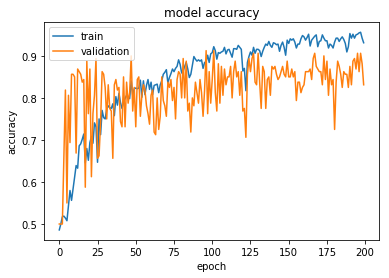

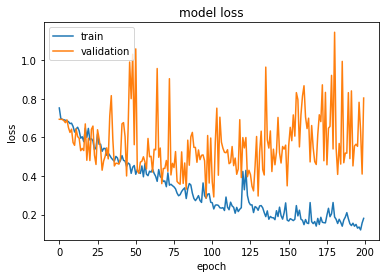

In [28]:
#train the model

'''def resize_arr(imgs):
        imgsp = imgs.reshape((imgs.shape[0], img_cols, img_rows, 1))
        return imgsp'''

def train():
    
    model = get_unet()
    print("got model")
    model.summary()

    model_checkpoint = ModelCheckpoint('unet.hdf5', monitor='loss',verbose=1, save_best_only=True)
    print('Fitting model...')
    
    #train_generator2 = resize_arr(train_generator)
    #validation_generator2 = resize_arr(validation_generator)
    
    history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = 200)
    
    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['binary_accuracy'])
    plt.plot(history.history['val_binary_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show() 
    
    return model
    
model = train()    

The model was trained for 200 epochs. From the accuracy and loss graphs, it's obvious that the model started being overfit from epoch number 131 onward.

In [32]:
#Extracting 10 patches of size 256X256 from each test image

path = '/home/hp/vada pav/data/test/1/'
path1 = '/home/hp/vada pav/data/test/0/'
list = os.listdir(path) # dir is your directory path
size = len(list)
print (size)

patch_size = (256, 256)

k=1
for i in range(1, size+1):
    img = cv2.imread(path+str(i)+'.png')
    img1 = cv2.imread(path1+str(i)+'.png')
    data = extract_patches_2d(img, patch_size, max_patches=10,random_state=1)
    data1 = extract_patches_2d(img1, patch_size, max_patches=10,random_state=1)
    print(data.shape)
    print(data1.shape)
    data = np.array(data) 
    data1 = np.array(data1) 
    print(data.shape)
    print(data1.shape)
    print('-'*30)
    #print(data.shape)
    #print(data1.shape)
    for j in range(data.shape[0]):
        img = data[j]
        img1 = data1[j]
        img = array_to_img(img)
        img1 = array_to_img(img1)
        img.save("/home/hp/vada pav/test2/1/%d.png"%(k))
        img1.save("/home/hp/vada pav/test2/0/%d.png"%(k))
        k = k+1

10
(10, 256, 256, 3)
(10, 256, 256, 3)
(10, 256, 256, 3)
(10, 256, 256, 3)
------------------------------
(10, 256, 256, 3)
(10, 256, 256, 3)
(10, 256, 256, 3)
(10, 256, 256, 3)
------------------------------
(10, 256, 256, 3)
(10, 256, 256, 3)
(10, 256, 256, 3)
(10, 256, 256, 3)
------------------------------
(10, 256, 256, 3)
(10, 256, 256, 3)
(10, 256, 256, 3)
(10, 256, 256, 3)
------------------------------
(10, 256, 256, 3)
(10, 256, 256, 3)
(10, 256, 256, 3)
(10, 256, 256, 3)
------------------------------
(10, 256, 256, 3)
(10, 256, 256, 3)
(10, 256, 256, 3)
(10, 256, 256, 3)
------------------------------
(10, 256, 256, 3)
(10, 256, 256, 3)
(10, 256, 256, 3)
(10, 256, 256, 3)
------------------------------
(10, 256, 256, 3)
(10, 256, 256, 3)
(10, 256, 256, 3)
(10, 256, 256, 3)
------------------------------
(10, 256, 256, 3)
(10, 256, 256, 3)
(10, 256, 256, 3)
(10, 256, 256, 3)
------------------------------
(10, 256, 256, 3)
(10, 256, 256, 3)
(10, 256, 256, 3)
(10, 256, 256, 3

In [33]:
#applied same augmentation, as the training set, to the test set to overcome data inadequacy

batch_size = 16
source = '/home/hp/vada pav/test2'

test_generator = datagen.flow_from_directory(
    source,
    #target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

Found 200 images belonging to 2 classes.


In [57]:
#calculates the accuracy of the model on the test set

loss, acc = model.evaluate_generator(test_generator, steps=3)

#print(loss)
print('accuracy is : %f' % (acc*100))

accuracy is : 79.166667
